# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="cp1252")
#q1.1
print(df_airbnb["Price"].head(10))
df_airbnb["Price_clean"] = (
    df_airbnb["Price"].astype(str)
    .str.replace(r"[\$,]", "", regex=True)   
    .str.strip()
)
df_airbnb["Price_clean"] = pd.to_numeric(df_airbnb["Price_clean"], errors="coerce")
df_airbnb.loc[df_airbnb["Price_clean"] <= 0, "Price_clean"] = np.nan
missing_price = df_airbnb["Price_clean"].isna().sum()
print("Missing Price_clean:", missing_price)
 

0    145
1     37
2     28
3    199
4    549
5    149
6    250
7     90
8    270
9    290
Name: Price, dtype: object
Missing Price_clean: 0


0.7619342359767892
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985




Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
survival_binary
NaN    1343
Name: count, dtype: int64


In [36]:
#q1.2
df_police = pd.read_csv("data/mn_police_use_of_force.csv", encoding="cp1252")

df_police["subject_injury_clean"] = (
    df_police["subject_injury"]
      .astype(str)
      .str.strip()
      .str.lower()
      .replace({"nan": np.nan, "none": np.nan, "": np.nan})
      .replace({"yes": "Yes", "y": "Yes", "true": "Yes", "1": "Yes",
                "no": "No", "n": "No", "false": "No", "0": "No"})
)

df_police.loc[~df_police["subject_injury_clean"].isin(["Yes", "No"]), "subject_injury_clean"] = np.nan

print(df_police["subject_injury_clean"].isna().mean())

print(pd.crosstab(df_police["force_type"], df_police["subject_injury_clean"], dropna=False))

df_police["subject_injury_clean"] = df_police["subject_injury_clean"].fillna("Missing")

print("\n")

0.7619342359767892
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985




In [35]:
#q1.3
df_meta = pd.read_csv("data/metabric.csv", encoding="cp1252")
df_meta["survival_binary"] = np.where(
    df_meta["Overall Survival Status"].astype(str).str.strip().str.lower() == "living", 1,
    np.where(df_meta["Overall Survival Status"].astype(str).str.strip().str.lower() == "deceased", 0, np.nan)
)
print("\n")
print(df_meta["Overall Survival Status"].value_counts(dropna=False))
print(df_meta["survival_binary"].value_counts(dropna=False))



Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
survival_binary
NaN    1343
Name: count, dtype: int64


In [37]:
#q1.4
missing = df_airbnb["Review Scores Rating"].isna().sum()
print(missing)

med = df_airbnb["Review Scores Rating"].median(skipna=True)
df_airbnb["Review_Scores_Rating_imputed"] = df_airbnb["Review Scores Rating"].fillna(med)

print(med)
print(df_airbnb["Review_Scores_Rating_imputed"].isna().sum())

8323
94.0
0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Loaded shape: (7070, 23)
After dropping empty cols/rows: (7070, 23)
One observation = one row (one reported shark-attack incident).
Number of observations (rows): 7070
Using columns: {'Year': 'Year', 'Age': 'Age', 'Type': 'Type', 'Fatal': 'Fatal Y/N'}
Year_clean range: (np.float64(1000.0), np.float64(2026.0))
Rows with Year >= 1940: 5534


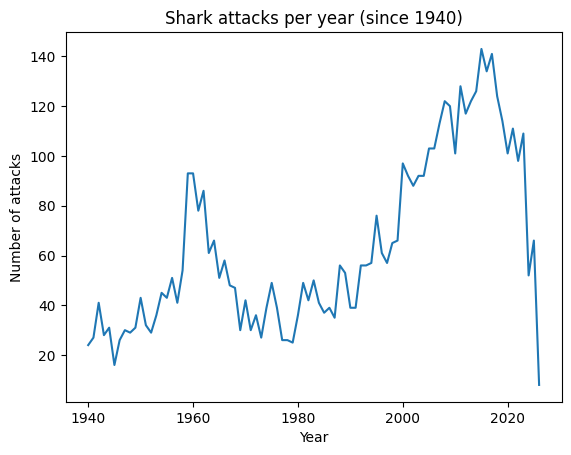

Age_clean range (non-missing): (np.float64(1.0), np.float64(87.0))
Missing Age_clean: 1823


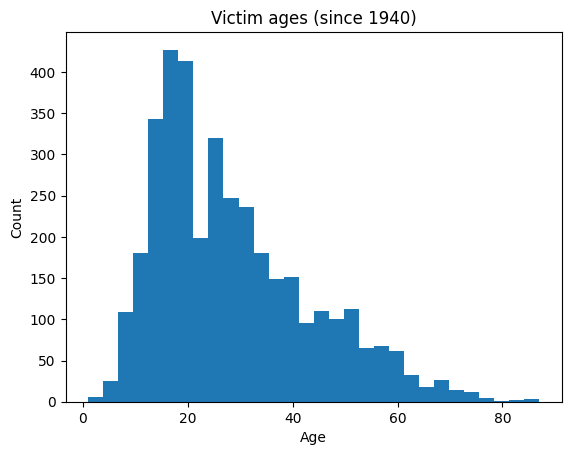

Type_clean
Unprovoked    4122
Unknown        889
Provoked       523
Name: count, dtype: int64
Proportion unprovoked (since 1940): 0.7448500180701121
Fatal_clean
N          4650
Y           830
Unknown      54
Name: count, dtype: int64
Type_clean
Provoked      0.025097
Unprovoked    0.169770
Name: Fatal_is_Y, dtype: float64
Fatal_clean     N  Unknown    Y
Type_clean                     
Provoked      505        5   13
Unprovoked   3389       40  693


In [41]:

# Q2.1
df = pd.read_excel("data/GSAF5.xls", sheet_name=0)
print("Loaded shape:", df.shape)

# Q2.2
df = df.dropna(axis=1, how="all").dropna(axis=0, how="all")
print("After dropping empty cols/rows:", df.shape)

# Q2.3
print("One observation = one row (one reported shark-attack incident).")
print("Number of observations (rows):", len(df))

def pick_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

COL_YEAR  = pick_col(["Year", "year"])
COL_AGE   = pick_col(["Age", "age"])
COL_TYPE  = pick_col(["Type", "type"])
COL_FATAL = pick_col(["Fatal Y/N", "Fatal", "fatal", "Fatal (Y/N)"])

print("Using columns:", {"Year": COL_YEAR, "Age": COL_AGE, "Type": COL_TYPE, "Fatal": COL_FATAL})

# Q2.4
year_raw = df[COL_YEAR].astype(str).str.strip()
year_4 = year_raw.str.extract(r"(\d{4})", expand=False)
df["Year_clean"] = pd.to_numeric(year_4, errors="coerce")

print("Year_clean range:", (df["Year_clean"].min(), df["Year_clean"].max()))

df_1940 = df[df["Year_clean"] >= 1940].copy()
print("Rows with Year >= 1940:", len(df_1940))

year_counts = df_1940["Year_clean"].value_counts().sort_index()
year_counts.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks per year (since 1940)")
plt.show()

# Q2.5
df_1940["Age_clean"] = pd.to_numeric(
    df_1940[COL_AGE].astype(str).str.extract(r"(\d+)", expand=False),
    errors="coerce"
)

print("Age_clean range (non-missing):", (df_1940["Age_clean"].min(), df_1940["Age_clean"].max()))
print("Missing Age_clean:", df_1940["Age_clean"].isna().sum())

df_1940["Age_clean"].dropna().plot(kind="hist", bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Victim ages (since 1940)")
plt.show()

# Q2.6
t = df_1940[COL_TYPE].astype(str).str.strip().str.lower()
df_1940["Type_clean"] = np.where(
    t.str.contains("unprovoked", na=False), "Unprovoked",
    np.where(t.str.contains("provoked", na=False), "Provoked", "Unknown")
)

prop_unprovoked = (df_1940["Type_clean"] == "Unprovoked").mean()
print(df_1940["Type_clean"].value_counts(dropna=False))
print("Proportion unprovoked (since 1940):", prop_unprovoked)

# Q2.7
f = df_1940[COL_FATAL].astype(str).str.strip().str.upper()
df_1940["Fatal_clean"] = np.where(
    f.str.startswith("Y", na=False), "Y",
    np.where(f.str.startswith("N", na=False), "N", "Unknown")
)

print(df_1940["Fatal_clean"].value_counts(dropna=False))

# Q2.8
sub = df_1940[df_1940["Type_clean"].isin(["Provoked", "Unprovoked"])].copy()
sub_known = sub[sub["Fatal_clean"].isin(["Y", "N"])].copy()

sub_known["Fatal_is_Y"] = (sub_known["Fatal_clean"] == "Y").astype(int)
print(sub_known.groupby("Type_clean")["Fatal_is_Y"].mean())

print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"], dropna=False))

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

### 1) 
It explains **data tidying**: putting messy data into a standard structure so analysis is easier.

### 2) 
A **consistent way to organize data** so tools work smoothly and you do less ad-hoc cleaning.

### 3) 
- **“Tidy datasets are all alike…”**: tidy data follows one standard structure; messy data can be messy in many different ways.
- **“Easy for a given dataset… hard in general…”**: for one dataset it’s usually clear what rows/columns should mean, but in general “variable vs observation” depends on context.

### 4) 
- **Values**: the actual entries (numbers/strings).
- **Variables**: values that measure the same attribute.
- **Observations**: all values measured on the same unit.

### 5)
- Each variable is a column.
- Each observation is a row.
- Each type of observational unit is a table.

### 6)
**Five common messy-data problems**
1. Column headers are values, not variable names
2. Multiple variables stored in one column
3. Variables stored in both rows and columns
4. Multiple observational unit types in one table
5. One observational unit stored in multiple tables

**Why Table 4 is messy**
The income brackets are column headers but they are really values of an “income” variable.

**What “melting” means**
Melting turns many columns into two columns (a “column-name” variable and a “value” column), keeping ID columns.

### 7)
Table 11 is messy because days (d1–d31) are spread across columns and “element” holds variable names (tmin/tmax). Table 12(a) is molten after melting (long format), and Table 12(b) is tidy after casting “element” into separate columns.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

(28221, 10)
Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


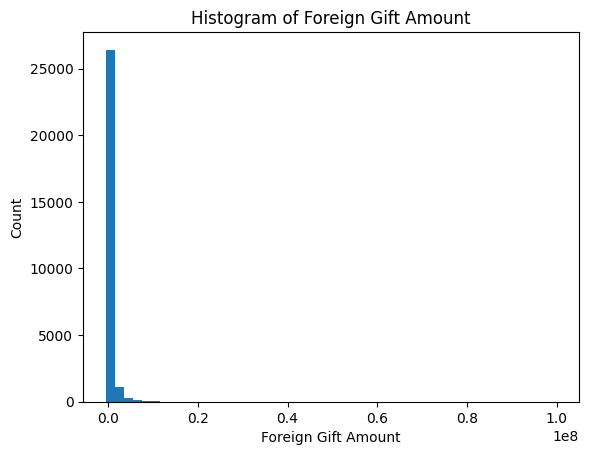

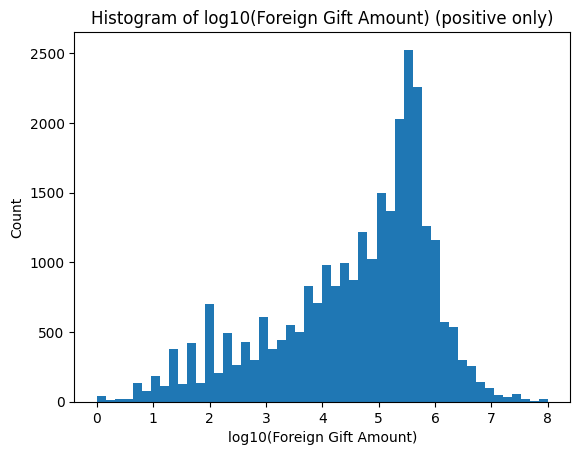

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


KeyError: 'Foreign Country'

In [45]:
df = pd.read_csv("data/ForeignGifts_edu.csv")
print(df.shape)
print(df.columns)
df.head()

amt_col = "Foreign Gift Amount"
gift_type_col = "Gift Type"
country_col = "Foreign Country"
inst_col = "Institution Name"
giver_col = "Foreign Giftor"

df[amt_col] = (
    df[amt_col].astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.strip()
)
df[amt_col] = pd.to_numeric(df[amt_col], errors="coerce")

# Q4.2
print(df[amt_col].describe())

df[amt_col].dropna().plot(kind="hist", bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

df.loc[df[amt_col] > 0, amt_col].apply(np.log10).plot(kind="hist", bins=50)
plt.xlabel("log10(Foreign Gift Amount)")
plt.ylabel("Count")
plt.title("Histogram of log10(Foreign Gift Amount) (positive only)")
plt.show()

# Q4.3
gift_counts = df[gift_type_col].value_counts(dropna=False)
gift_props = df[gift_type_col].value_counts(normalize=True, dropna=False)
print(gift_counts)
print(gift_props)

# Q4.4
top15_country_count = df.groupby(country_col).size().sort_values(ascending=False).head(15)
top15_country_sum = df.groupby(country_col)[amt_col].sum(min_count=1).sort_values(ascending=False).head(15)
print(top15_country_count)
print(top15_country_sum)

# Q4.5
inst_totals = df.groupby(inst_col)[amt_col].sum(min_count=1).sort_values(ascending=False)
print(inst_totals.head(15))

inst_totals.dropna().plot(kind="hist", bins=50)
plt.xlabel("Total received by institution")
plt.ylabel("Number of institutions")
plt.title("Histogram of total amount received (by institution)")
plt.show()

inst_totals[inst_totals > 0].apply(np.log10).plot(kind="hist", bins=50)
plt.xlabel("log10(total received)")
plt.ylabel("Number of institutions")
plt.title("Histogram of log10(total received) (positive only)")
plt.show()

# Q4.6
giver_totals = df.groupby(giver_col)[amt_col].sum(min_count=1).sort_values(ascending=False)
print(giver_totals.head(20))

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

Observations (rows): 3798
Variables (cols): 63
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges-

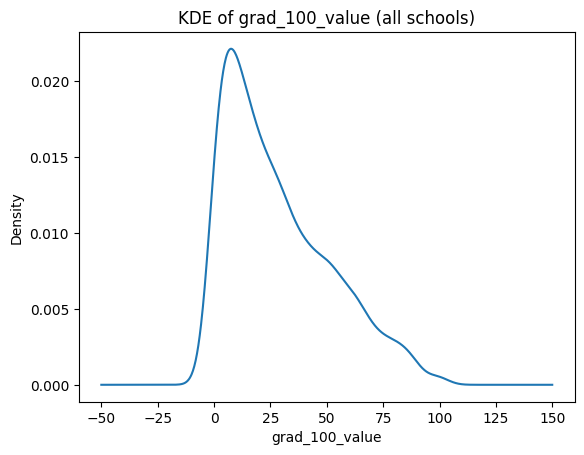

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


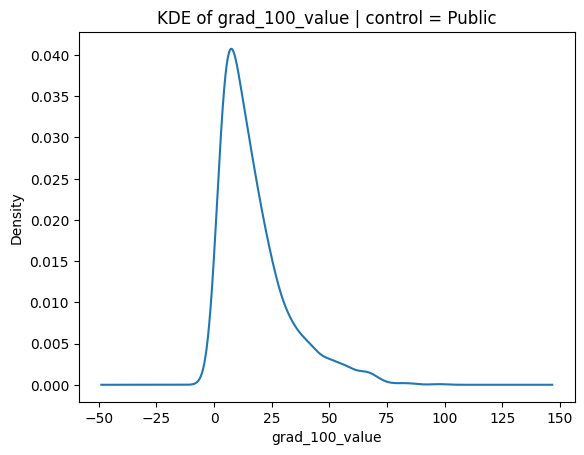

Public
count    1499.000000
mean       17.430887
std        14.729443
min         0.000000
25%         6.900000
50%        13.200000
75%        23.250000
max        97.800000
Name: grad_100_value, dtype: float64


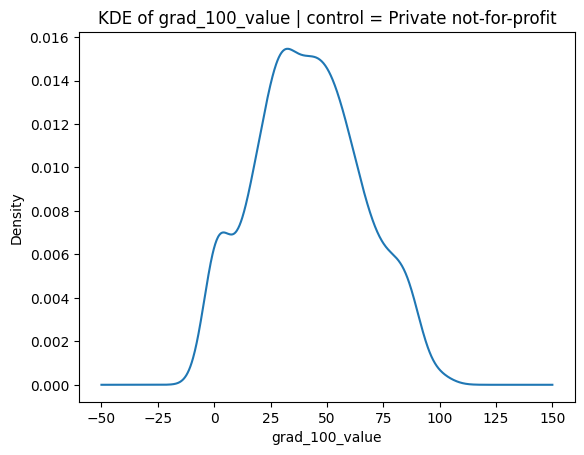

Private not-for-profit
count    1189.000000
mean       41.660976
std        23.551231
min         0.000000
25%        25.000000
50%        41.000000
75%        58.300000
max       100.000000
Name: grad_100_value, dtype: float64


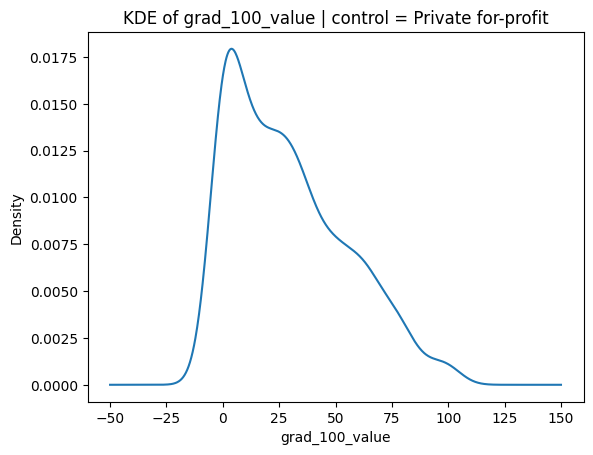

Private for-profit
count    779.000000
mean      29.108858
std       25.601687
min        0.000000
25%        6.950000
50%       24.700000
75%       46.750000
max      100.000000
Name: grad_100_value, dtype: float64


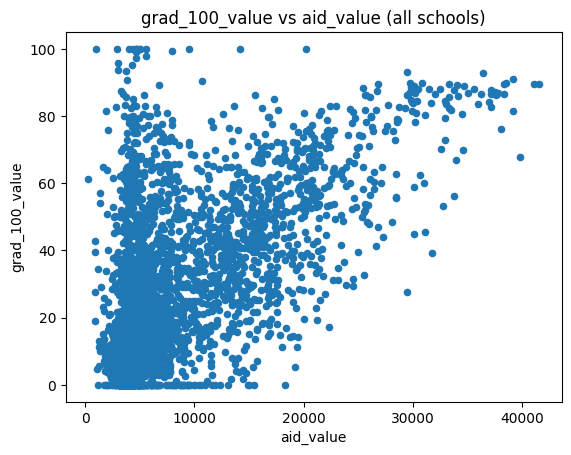

Cov (all): 88610.4831690244
Corr (all): 0.5758792845936078


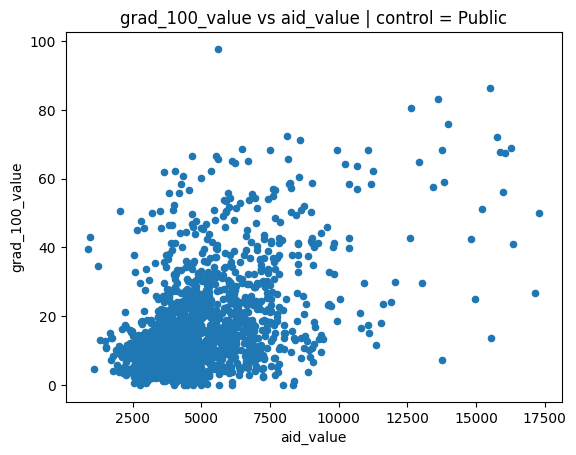

Public
Cov: 15355.146211760215
Corr: 0.48248104589833807


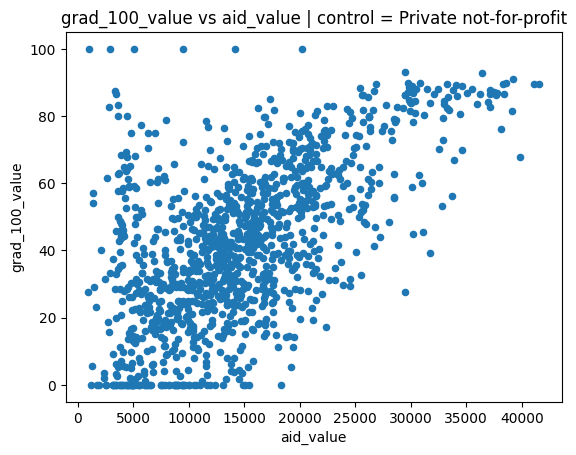

Private not-for-profit
Cov: 109274.12333702881
Corr: 0.6015909241488574


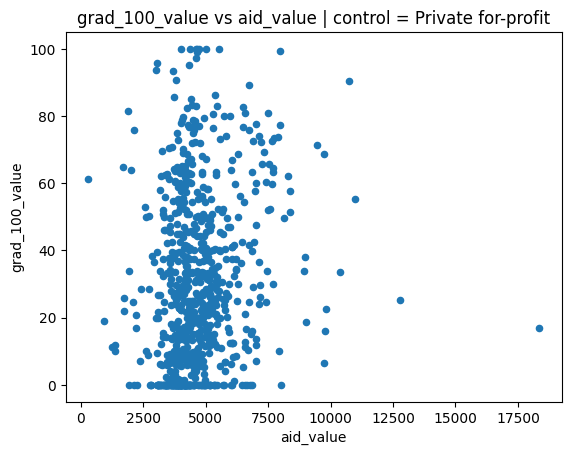

Private for-profit
Cov: 6897.524957237811
Corr: 0.18836270084245582


In [46]:
df = pd.read_csv("data/college_completion.csv", encoding="cp1252")

# Q5.1
df.head()

# Q5.2
print("Observations (rows):", df.shape[0])
print("Variables (cols):", df.shape[1])
print(df.head())

# Q5.3
ct = pd.crosstab(df["control"], df["level"], dropna=False)
print(ct)
print(ct.div(ct.sum(axis=1), axis=0))  # row proportions

# Q5.4
df["grad_100_value"] = pd.to_numeric(df["grad_100_value"], errors="coerce")

df["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value (all schools)")
plt.show()

print(df["grad_100_value"].describe())

for c in df["control"].dropna().unique():
    sub = df[df["control"] == c].copy()
    sub["grad_100_value"].dropna().plot(kind="kde")
    plt.xlabel("grad_100_value")
    plt.title(f"KDE of grad_100_value | control = {c}")
    plt.show()
    print(c)
    print(sub["grad_100_value"].describe())

# Q5.5
df["aid_value"] = pd.to_numeric(df["aid_value"], errors="coerce")

sub = df[["aid_value", "grad_100_value"]].dropna()
sub.plot(kind="scatter", x="aid_value", y="grad_100_value")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value (all schools)")
plt.show()

cov_all = sub["aid_value"].cov(sub["grad_100_value"])
corr_all = sub["aid_value"].corr(sub["grad_100_value"])
print("Cov (all):", cov_all)
print("Corr (all):", corr_all)

for c in df["control"].dropna().unique():
    subc = df[df["control"] == c][["aid_value", "grad_100_value"]].dropna()
    if len(subc) > 2:
        subc.plot(kind="scatter", x="aid_value", y="grad_100_value")
        plt.xlabel("aid_value")
        plt.ylabel("grad_100_value")
        plt.title(f"grad_100_value vs aid_value | control = {c}")
        plt.show()
        print(c)
        print("Cov:", subc["aid_value"].cov(subc["grad_100_value"]))
        print("Corr:", subc["aid_value"].corr(subc["grad_100_value"]))

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

1) **Mean:** Adding $a$ shifts the data, and multiplying by $b$ scales it, so  
$$m(a+bX)=a+b\,m(X).$$

1) **Cov with itself:** Covariance of $X$ with itself is the average squared deviation (the variance), so  
$$\operatorname{cov}(X,X)=s^2.$$

1) **Cov with $a+bY$:** Adding a constant doesn’t change deviations, and scaling by $b$ scales deviations, so  
$$\operatorname{cov}(X,a+bY)=b\,\operatorname{cov}(X,Y).$$

1) **Cov with both transformed:** Both variables’ deviations get scaled by $b$, so the product scales by $b^2$, so  
$$\operatorname{cov}(a+bX,a+bY)=b^2\operatorname{cov}(X,Y),\quad \operatorname{cov}(bX,bX)=b^2s^2.$$

1) **Median and IQR (if $b>0$):** When $b>0$, the order stays the same, so quantiles just shift/scale:  
$$\operatorname{med}(a+bX)=a+b\,\operatorname{med}(X),\quad \operatorname{IQR}(a+bX)=b\,\operatorname{IQR}(X).$$

1) **Nonlinear example:** Means don’t “pass through” nonlinear functions.  
If $X=\{0,2\}$, then $m(X)=1$ but $m(X^2)=2\ne 1^2$.  
If $X=\{1,4\}$, then $m(\sqrt{X})=1.5\ne \sqrt{2.5}$.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

(2930, 82)
    price Bldg.Type
0  215000      1Fam
1  105000      1Fam
2  172000      1Fam
3  244000      1Fam
4  189900      1Fam
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


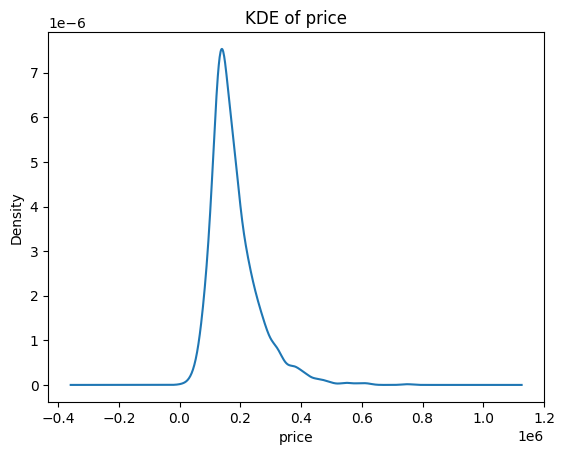

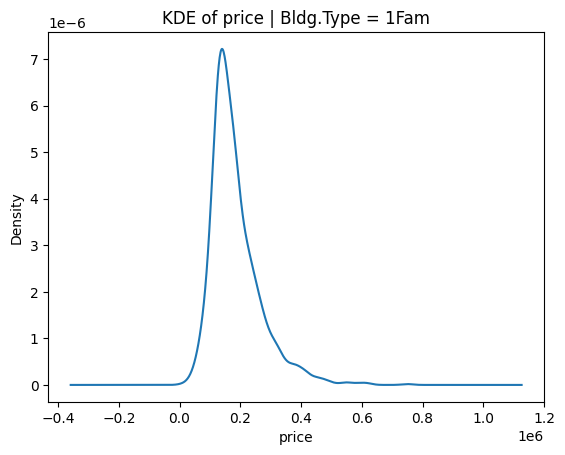

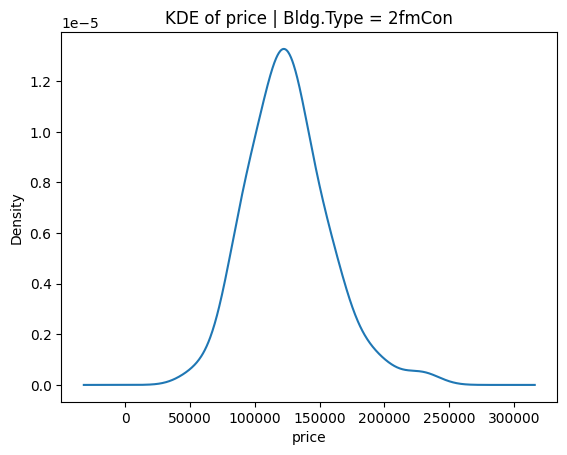

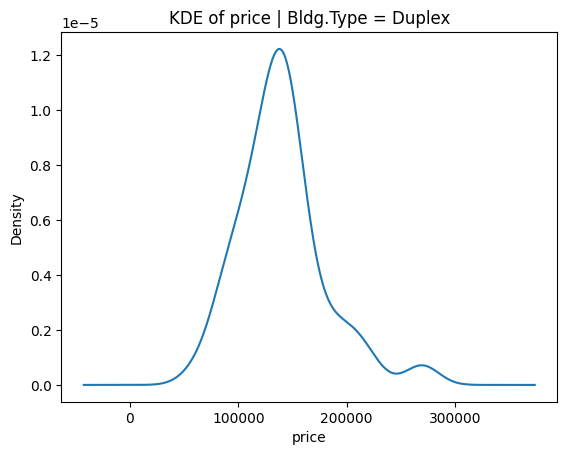

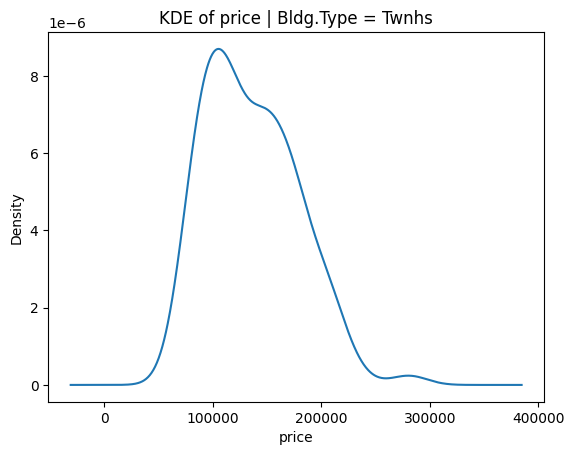

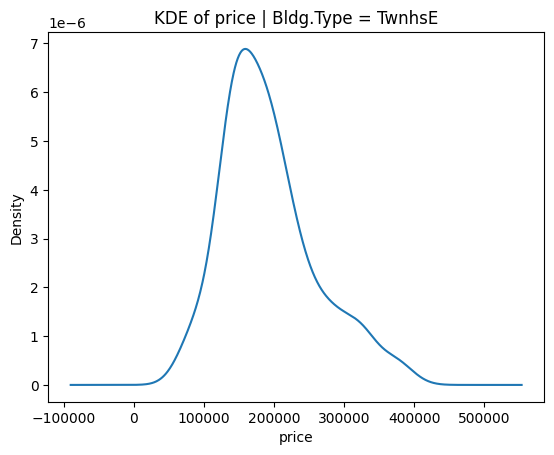

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  
Most expensive on average (mean):
Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: mean, dtype: float64
Highest variance (var):
Bldg.Ty

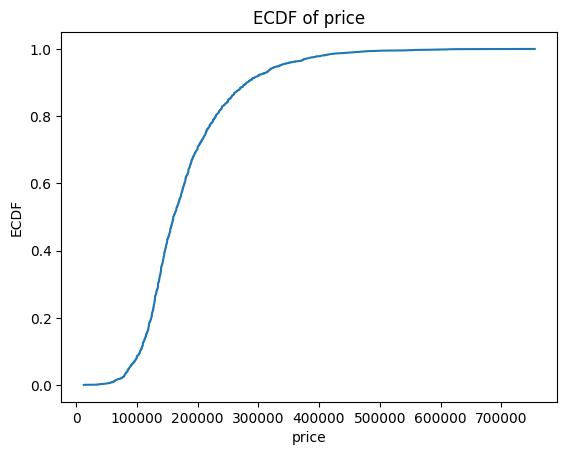

5-number summary: {'min': 12789.0, 'q25': 129500.0, 'median': 160000.0, 'q75': 213500.0, 'max': 755000.0}


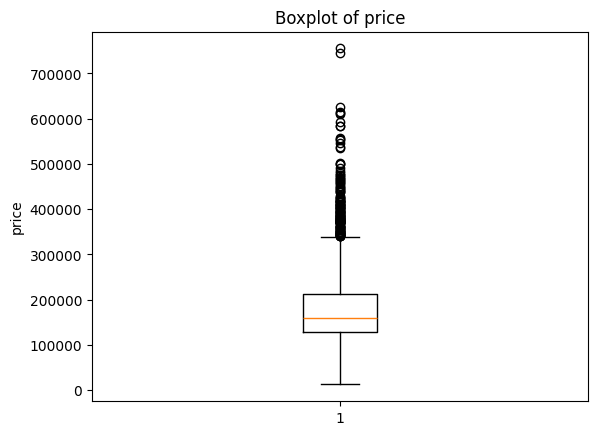

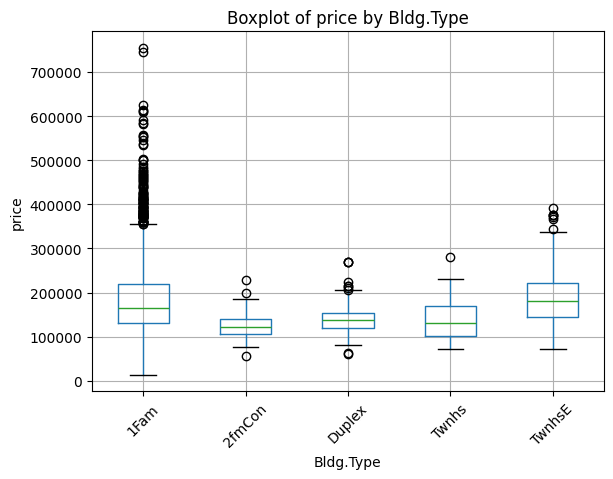

outlier
0    2793
1     137
Name: count, dtype: int64
Outlier rate: 0.04675767918088737
Winsorized describe:
count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64


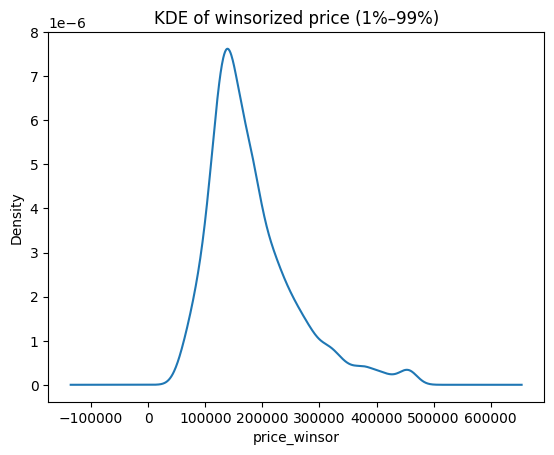

In [47]:
# Q7.1
df = pd.read_csv("data/ames_prices.csv", encoding="cp1252")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

print(df.shape)
print(df[["price", "Bldg.Type"]].head())

# Q7.2
print(df["price"].describe())

df["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price")
plt.show()

for bt, sub in df.groupby("Bldg.Type"):
    sub["price"].dropna().plot(kind="kde")
    plt.xlabel("price")
    plt.title(f"KDE of price | Bldg.Type = {bt}")
    plt.show()

by_type_desc = df.groupby("Bldg.Type")["price"].describe()
print(by_type_desc)

print("Most expensive on average (mean):")
print(by_type_desc["mean"].sort_values(ascending=False))

print("Highest variance (var):")
print(df.groupby("Bldg.Type")["price"].var().sort_values(ascending=False))

# Q7.3
x = df["price"].dropna().sort_values().to_numpy()
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y)
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of price")
plt.show()

five_num = {
    "min": float(np.min(x)),
    "q25": float(np.quantile(x, 0.25)),
    "median": float(np.quantile(x, 0.50)),
    "q75": float(np.quantile(x, 0.75)),
    "max": float(np.max(x)),
}
print("5-number summary:", five_num)

# Q7.4
plt.boxplot(df["price"].dropna(), vert=True)
plt.ylabel("price")
plt.title("Boxplot of price")
plt.show()

df.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("Boxplot of price by Bldg.Type")
plt.suptitle("")
plt.ylabel("price")
plt.show()

# Q7.5
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df["outlier"] = ((df["price"] < lower) | (df["price"] > upper)).astype(int)
print(df["outlier"].value_counts())
print("Outlier rate:", df["outlier"].mean())

# Q7.6
lo = df["price"].quantile(0.01)
hi = df["price"].quantile(0.99)
df["price_winsor"] = df["price"].clip(lower=lo, upper=hi)

print("Winsorized describe:")
print(df["price_winsor"].describe())

df["price_winsor"].dropna().plot(kind="kde")
plt.xlabel("price_winsor")
plt.title("KDE of winsorized price (1%–99%)")
plt.show()